In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

Check whether changes to the assumed cosmological parameters could produce a spurious signal comparable to our measurement.

In [2]:
# Define the assumed pairs of OmegaM and H0 which we check
pars = [[0.3158, 67.32], [0.3158, 72.0], [0.28, 67.32],[0.30, 68.0], [0.28, 72.0]]

In [4]:
# Load the theoretical gammaIA values with these assumed parameters
gammas = [0]*len(pars); thetas = [0]*len(pars)
for i in range(0,len(pars)):
    thetas[i], gammas[i] = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_DESY1_no_fidIA_DESHoD_assumedpar_OmM='+str(pars[i][0])+'_HH0='+str(pars[i][1])+'.txt', unpack=True)

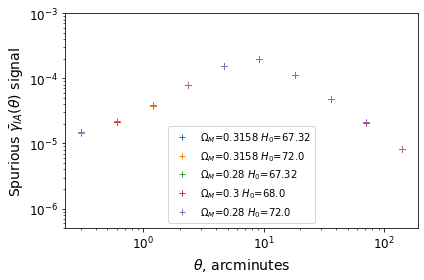

In [5]:
# Plot the gamma_IA signals - these are pure lensings with project effect + any effect from different parameters
plt.figure()
for i in range(0,len(pars)):
    plt.loglog(thetas[i], gammas[i], '+', label='$\Omega_M$='+str(pars[i][0])+' $H_0$='+str(pars[i][1])+'')
plt.ylabel('Spurious $\\bar{\gamma}_{IA}(\\theta)$ signal', fontsize='14')
plt.xlabel('$\\theta$, arcminutes', fontsize='14')
#plt.title('No IA, vary cosmological parameters')
plt.ylim(5.*10**(-7),10**(-3))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
#plt.savefig('./vary_cosmological_parameters_variableF_higherresdNdz.pdf')
plt.show()

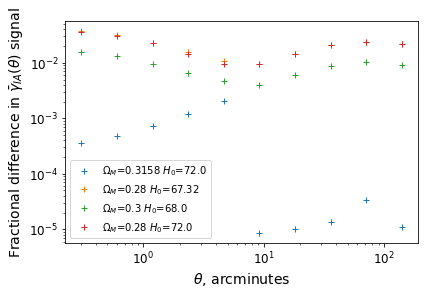

In [6]:
# Fractional difference between the spurious gammat with assuming the fiducial cosmological parameters,
# which should only come from the non-thin projection length, and the spurious signal with assuming other
# cosmological parameters

plt.figure()
for i in range(1,len(pars)):
    plt.loglog(thetas[i], np.abs(gammas[i]-gammas[0])/np.abs(gammas[0]), '+', label='$\Omega_M$='+str(pars[i][0])+' $H_0$='+str(pars[i][1])+'') 
    #print(np.abs(gammas[i]-gammas[-1])/np.abs(gammas[-1]))
    plt.ylabel('Fractional difference in $\\bar{\gamma}_{IA}(\\theta)$ signal', fontsize='14')
plt.xlabel('$\\theta$, arcminutes', fontsize='14')
#plt.title('No IA, vary cosmological parameters')
#plt.ylim(5.*10**(-7),10**(-1))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()
#plt.savefig('./vary_cosmological_parameters_variableF_higherresdNdz_fracdiff.pdf')

In [7]:
# The effect of changing the cosmological parametse is very small, few percent at most.

In [8]:
# Probably also want to do some kind of chi^2 check for varying the cosmological parameters
# And indeed from the projection length alone

In [9]:
# Load data vectors for each case and get the chi squared.
# Load the covariance in order to do this
data_cov = np.load('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/CovMat.npy')
#data_cov_cut = data_cov[1:,1:]
#cut_first_data_point = np.delete(np.delete(data_cov,[0], axis=0), [0], axis=1)
#print(data_cov.shape)
#inv_data_cov_cut = np.linalg.inv(data_cov_cut)
inv_data_cov = np.linalg.inv(data_cov)
gamma_IA_fid = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/GammaIA')

In [10]:
# Get the number of degrees of freedom. Here this is the number of angular bins.
DOF = len(gamma_IA_fid)

In [11]:
# Consider first the projection effect (non-thin lens bin) only.
# The fiducial parameters are the first in our params array so gammas[0] is this case.
diff = gammas[0] - gamma_IA_fid
chisquared = np.dot(diff,np.dot(inv_data_cov,diff))

In [12]:
# We would like to check whether a model where the only signal comes from the projection over a non-thin
# lens distribution is supported by the data.
# We do this by considering a chi squared distribution with degrees of freedom =num data pts.
# The value of the CDF of this distribution at the chi squared we get tells us how likely it is, in the case
# where the projection-only model describes the data, that we would have got this chi squared
# For example, if the CDF is 0.68, it tells us that 68% of the time we would have drawn a chi squared
# at or below what we got if our model is correct.

# This means that for our model to agree with the data at the one-sigma level, the CDF should be 0.68 or lower.
# To agree at the 2-sigma level, it should be 0.95 or lower.

cdf = chi2.cdf(chisquared, DOF)
print(cdf)

0.9822079724102839


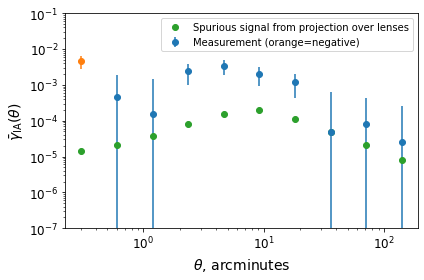

In [13]:
# Projection-only disagrees with the data at greater than 2-sigma.
# Visualise this with a plot:

plt.figure()
plt.errorbar(thetas[-1], gamma_IA_fid, fmt='o',yerr=np.sqrt(np.diag(data_cov)), label="Measurement (orange=negative)")
plt.errorbar(thetas[-1][0], -gamma_IA_fid[0], fmt='o',yerr=np.sqrt(np.diag(data_cov))[0])
plt.plot(thetas[-1], gammas[0], 'o',label="Spurious signal from projection over lenses")
plt.xlabel('$\\theta$, arcminutes', fontsize='14')
plt.ylabel('$\\bar{\gamma}_{\\rm IA}(\\theta)$', fontsize='14')
plt.yscale('log')
plt.xscale('log')
plt.ylim(10**(-7), 10**(-1))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
#plt.savefig('./projection_length_spurious_signal_Planck18.png')
plt.show()
             

In [ ]:
# Now get the CDF values for the different cosmological parameters in the model (with the projection length effect).

In [14]:
cdf_cosmo = np.zeros(len(gammas))
for i in range(0,len(gammas)):
    diff = gammas[i] - gamma_IA_fid
    chisquared = np.dot(diff,np.dot(inv_data_cov,diff))
    print(chisquared/10.)
    cdf_cosmo[i] = chi2.cdf(chisquared,DOF)
    #reduced = chisquared / len(gamma_IA_fid)
    #print("reduced chisquared=", reduced)

2.1512184222885824
2.1513730677841054
2.149350363773725
2.1504259154063514
2.149461003510366


In [15]:
print(cdf_cosmo)

[0.98220797 0.98221716 0.98209661 0.98216081 0.98210323]


In [ ]:
# Varying the cosmological parameters makes no significant difference.
# The model still disagrees with the data at greater than 2-sigma.